In [65]:
# Inport dependencies
import pandas as pd
import numpy as np
import os 
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [66]:
# Read csv file into DataFrame
from operator import index


df = pd.read_csv("Clean_dataframe.csv")
df.head()

,Unnamed: 0,App Name,Category,Rating,Rating Count,Maximum Installs,Price
0,0,Gakondo,Adventure,0.0,0.0,15,0.0
1,1,Ampere Battery Info,Tools,4.4,64.0,7662,0.0
2,2,Vibook,Productivity,0.0,0.0,58,0.0
3,3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,19,0.0
4,4,GROW.me,Tools,0.0,0.0,478,0.0


In [67]:
# Replace the spaces in the column names with underscores
df.columns = [c.replace(' ', '_') for c in df.columns]

In [68]:
# This dataframe is too big and can crash the kernel when doing a machine learning, so let's see if we can split it by category. 
# Check how many apps in each category
from unicodedata import category


categories = df.Category.value_counts()
categories

Education                  239786
Music & Audio              154589
Business                   142151
Tools                      141972
Entertainment              137578
Lifestyle                  117764
Books & Reference          116493
Personalization             89012
Health & Fitness            82598
Productivity                78244
Shopping                    74753
Food & Drink                73444
Travel & Local              66667
Finance                     64730
Arcade                      52706
Puzzle                      50269
Casual                      49257
Communication               47545
Sports                      47052
Social                      44044
News & Magazines            42583
Photography                 35386
Medical                     31690
Action                      26827
Maps & Navigation           26350
Adventure                   22787
Simulation                  22724
Educational                 21059
Art & Design                18392
Auto & Vehicle

In [69]:
# Check which categories are the most popular accoring to the number of installs. 
max_installs = df.groupby(['Category'])[['Maximum_Installs']].sum().sort_values(by = 'Maximum_Installs', ascending = False)
max_installs.head(10)

,Maximum_Installs
Category,
Tools,119813815575
Communication,72294407091
Productivity,45357849368
Entertainment,32517964390
Social,32211141319
Video Players & Editors,31426736337
Photography,31242080271
Action,30691954114
Casual,30440839129


In [70]:
# The Category "Action" in top 10 downlowded apps and has only 26826 rows.
# Create a dataframe with only Action category.
category_action = df.loc[df["Category"]== "Action"]
category_action

,Unnamed:_0,App_Name,Category,Rating,Rating_Count,Maximum_Installs,Price
213,215,忍者道場,Action,0.0,0.0,306,0.0
218,220,Tank War,Action,0.0,0.0,66,0.0
219,221,John Brick,Action,3.9,11.0,522,0.0
396,399,Warrior of War,Action,4.0,731.0,71674,0.0
500,504,Balloon Popper,Action,4.8,19.0,153,0.0
...,...,...,...,...,...,...,...
2289643,2312522,Taken Tag3 - Fighting Game 3D,Action,3.5,27.0,7096,0.0
2289671,2312551,Mindclash,Action,3.8,10.0,899,0.0
2289676,2312557,Funny Mercenary - MOBA DOTA,Action,0.0,0.0,7343,0.0
2289918,2312802,Fighting,Action,3.2,2979.0,220857,0.0


In [95]:
# For multiple linear regression model we need just columns with numerical values to check if it works
ml_df = category_action[["Rating_Count", "Maximum_Installs", "Price", "Rating"]]
ml_df.columns = ml_df.columns.str.replace(' ', '', regex=True)
ml_df

,Rating_Count,Maximum_Installs,Price,Rating
213,0.0,306,0.0,0.0
218,0.0,66,0.0,0.0
219,11.0,522,0.0,3.9
396,731.0,71674,0.0,4.0
500,19.0,153,0.0,4.8
...,...,...,...,...
2289643,27.0,7096,0.0,3.5
2289671,10.0,899,0.0,3.8
2289676,0.0,7343,0.0,0.0
2289918,2979.0,220857,0.0,3.2


In [96]:
# Check a summary of numerical data
ml_df.describe()

,Rating_Count,Maximum_Installs,Price,Rating
count,2.682700e+04,2.682700e+04,26827.000000,26827.000000
mean,2.080524e+04,1.144070e+06,0.067986,2.705979
std,6.590547e+05,1.322481e+07,0.713353,1.941327
min,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,1.020000e+02,0.000000,0.000000
50%,1.500000e+01,1.693000e+03,0.000000,3.700000
75%,2.010000e+02,4.281900e+04,0.000000,4.200000
max,8.917710e+07,9.765360e+08,59.990000,5.000000


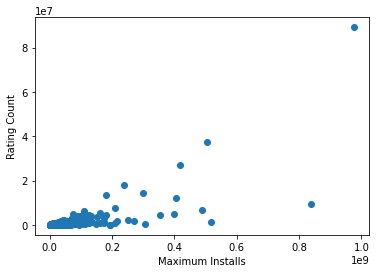

In [97]:
# Check if two columns Maximum_Installs and Raiting_Count are correlated
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
plt.scatter(ml_df.Maximum_Installs,ml_df.Rating_Count)

plt.xlabel('Maximum Installs')
plt.ylabel('Rating Count')
plt.show()

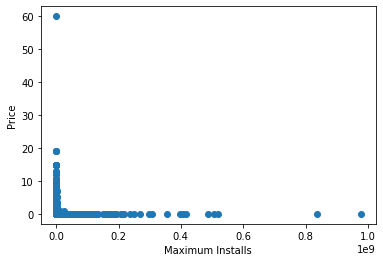

In [130]:
# Check if two columns Maximum_Installs and Raiting_Count are correlated
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
plt.scatter(ml_df.Maximum_Installs,ml_df.Price)

plt.xlabel('Maximum Installs')
plt.ylabel('Price')
plt.show()

In [126]:
from sklearn.model_selection import train_test_split

# Split our preprocessed data into our features and target arrays
X = ml_df.drop(columns="Maximum_Installs").values.reshape(-1,3)  
y = ml_df["Maximum_Installs"].values.reshape(-1,1)


In [129]:
# Check for X array
print(X)

[[0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00]
 [1.10000e+01 0.00000e+00 3.90000e+00]
 ...
 [0.00000e+00 0.00000e+00 0.00000e+00]
 [2.97900e+03 0.00000e+00 3.20000e+00]
 [1.03466e+05 0.00000e+00 4.30000e+00]]


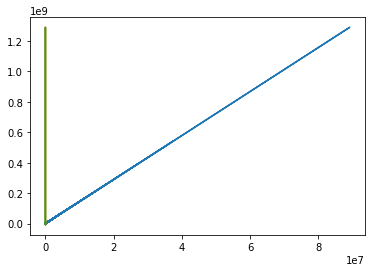

In [128]:

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Define the machine learning model
m = LinearRegression()

# Train the model
m.fit(X,y)

#Evaluate the model
prediction = m.predict(X)
plt.plot(X, prediction)


In [131]:
# Print accuracy score

print(m.score(X,y))

0.5214831279810133
